In [1]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 673M/675M [00:37<00:00, 21.0MB/s]
100% 675M/675M [00:37<00:00, 18.8MB/s]


In [2]:
# unzip the file 
import zipfile
zip_ref = zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
!ls

cell_images			       drive	    sample_data
cell-images-for-detecting-malaria.zip  kaggle.json


In [4]:
#import all the necessary libraries
import os # for accessing the files 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # visualize and process the image
import cv2 # open cv
from google.colab.patches import cv2_imshow # per cell e img show korar jnno within this window
from PIL import Image #read images and do some processes on it 
from sklearn.model_selection import train_test_split
import seaborn as sns
from glob import glob
import pandas as pd
import keras

In [5]:
image_folder = '/content/cell_images/cell_images/Parasitized'
file_to_delete = '/content/cell_images/cell_images/Parasitized/Thumbs.db'

# Construct the full path to the file
file_path = os.path.join(image_folder, file_to_delete)

# Check if the file exists
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_to_delete} deleted successfully.")
else:
    print(f"{file_to_delete} does not exist.")

/content/cell_images/cell_images/Parasitized/Thumbs.db deleted successfully.


In [6]:
image_folder = '/content/cell_images/cell_images/Uninfected'
file_to_delete = '/content/cell_images/cell_images/Uninfected/Thumbs.db'

# Construct the full path to the file
file_path = os.path.join(image_folder, file_to_delete)

# Check if the file exists
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_to_delete} deleted successfully.")
else:
    print(f"{file_to_delete} does not exist.")

/content/cell_images/cell_images/Uninfected/Thumbs.db deleted successfully.


In [7]:
# Creating the label 
# 0 -> parasitize 
# 1 -> uninfected 


parasitized_label = [0]*13779
uninfected_label = [1]*13779

In [8]:
labels = parasitized_label + uninfected_label 
print(labels[0:5])
print(labels[-5:])
print(len(labels))

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
27558


In [9]:
dataset_path = "/content/cell_images/cell_images"

images = []

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    
    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image,(128,128),interpolation=cv2.INTER_LINEAR)
        #image = image.resize((128,128))
        images.append(image)
        
  
X = np.array(images)
Y = np.array(labels)


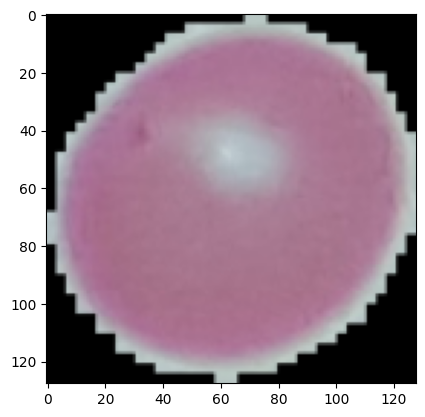

In [10]:
plt.imshow(X[1])

In [11]:
print(len(X))

27558


In [12]:
print((X[3].shape))

(128, 128, 3)


In [13]:
print('type of data :',type(X[0]))
print("Shape of the image :",X[0].shape)
print("type of the labels :",type(labels))

type of data : <class 'numpy.ndarray'>
Shape of the image : (128, 128, 3)
type of the labels : <class 'list'>


In [14]:
print("The shape of x :",X.shape)
print("The shape of y :",Y.shape)

The shape of x : (27558, 128, 128, 3)
The shape of y : (27558,)


In [15]:
from keras.utils import to_categorical
num_classes = len(np.unique(Y))
# Convert the labels to categorical format
Y = to_categorical(Y,num_classes=num_classes)
Y.shape

(27558, 2)

In [16]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 101)

In [17]:
print("x shape ",X.shape)
print("x_train shape ",x_train.shape)
print("x_test shape ",x_test.shape)

x shape  (27558, 128, 128, 3)
x_train shape  (24802, 128, 128, 3)
x_test shape  (2756, 128, 128, 3)


In [18]:
print('y shape ',Y.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

y shape  (27558, 2)
y_train shape  (24802, 2)
y_test shape  (2756, 2)


Another approach CNN


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import  RMSprop


# Define a sequential model
model = Sequential()

# Add convolutional layer with 32 filters, kernel size of (3,3), ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
# Add max pooling layer with pool size of (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                                   # CONV BLOCK 1
# Add batch normalization layer
model.add(BatchNormalization())

# Add convolutional layer with 32 filters, kernel size of (3,3), ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))
# Add max pooling layer with pool size of (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add batch normalization layer                                                                                               # CONV BLOCK 2
model.add(BatchNormalization())
# Add dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add convolutional layer with 64 filters, kernel size of (3,3), ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# Add batch normalization layer
model.add(BatchNormalization())
# Add max pooling layer with pool size of (2,2)                                                                              # CONV BLOCK 3
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())

# Add dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Add dropout layer with a rate of 0.5
model.add(Dropout(0.5))                                                                                                     # CLASSIFICATION HEAD
# Add dense layer with 2 units and softmax activation
model.add(Dense(2, activation='softmax')) 

# Define optimizer as RMSprop with learning rate of 0.0001
optimizer = RMSprop(learning_rate=0.0001)

# Compile model with categorical crossentropy loss and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                        

In [20]:
history=model.fit(x_train,y_train,epochs = 20,validation_split =0.1)

Epoch 1/20
698/698 [==============================] - 25s 20ms/step - loss: 0.6820 - accuracy: 0.6480 - val_loss: 0.5969 - val_accuracy: 0.6727
Epoch 2/20
698/698 [==============================] - 14s 20ms/step - loss: 0.5679 - accuracy: 0.7194 - val_loss: 1.2103 - val_accuracy: 0.5679
Epoch 3/20
698/698 [==============================] - 14s 20ms/step - loss: 0.4694 - accuracy: 0.7840 - val_loss: 0.9967 - val_accuracy: 0.6638
Epoch 4/20
698/698 [==============================] - 14s 20ms/step - loss: 0.3520 - accuracy: 0.8506 - val_loss: 0.8833 - val_accuracy: 0.7541
Epoch 5/20
698/698 [==============================] - 14s 20ms/step - loss: 0.2712 - accuracy: 0.8927 - val_loss: 0.4470 - val_accuracy: 0.8448
Epoch 6/20
698/698 [==============================] - 14s 20ms/step - loss: 0.2404 - accuracy: 0.9146 - val_loss: 0.2215 - val_accuracy: 0.9246
Epoch 7/20
698/698 [==============================] - 14s 20ms/step - loss: 0.2154 - accuracy: 0.9239 - val_loss: 0.2591 - val_accuracy:

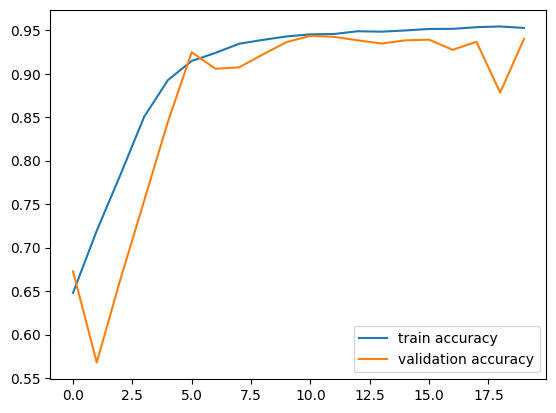

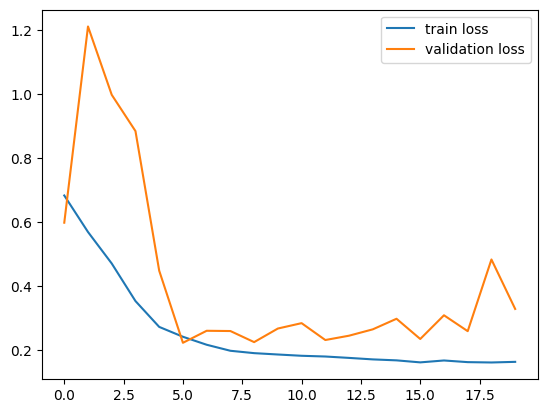

In [21]:
h = history
#plot the accuracy value 
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

#plot the loss value 
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

Give the image path :/content/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png


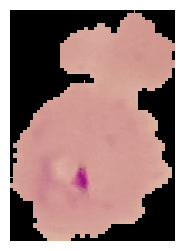

1/1 [==============================] - 0s 298ms/step
Probability of uninfected or infected [[3.617835e-05 9.999639e-01]]
1
infected


In [22]:
from google.colab.patches import cv2_imshow
labels = ['uninfected','infected']
input_image_path = input("Give the image path :")
img = cv2.imread(input_image_path)
img = cv2.resize(img,(128,128))
img_array = np.array(img)
img_array = img_array.reshape(1,128,128,3)

from tensorflow.keras.preprocessing import image
plt.figure(figsize=(4,3))
img = image.load_img(input_image_path)
plt.imshow(img,interpolation='nearest')
plt.axis('off')
plt.show()

a=model.predict(img_array)
print("Probability of uninfected or infected",a)
indices = a.argmax()
print(indices)
print(labels[indices])

In [26]:
model.save('/content/drive/MyDrive/Deep learning Save model/Maleria_detection_(cell_image)_CNN.h5')

In [23]:
dataset_path = "/content/cell_images/cell_images"

images = []
labels = []

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    
    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)
        image = cv2.imread(image_path)
        images.append(image)
        labels.append(label)
        

In [24]:
print(labels[0:5])
print(labels[-5:])
labels[0]

['Uninfected', 'Uninfected', 'Uninfected', 'Uninfected', 'Uninfected']
['Parasitized', 'Parasitized', 'Parasitized', 'Parasitized', 'Parasitized']


'Uninfected'

In [25]:
x = np.array(images)
y = np.array(labels)

<ipython-input-25-ec810aa8ba98>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(images)
